In [1]:
# Set the current working directory to the root directory
import os, sys
import random
sys.path.insert(0, os.path.abspath('..'))

In [2]:
from classes.slicedkex import SlicedKex
from classes.metakex import MetaKex
from classes.headerkex import HeaderKex
from classes.graphkex import GraphKex
from classes.smartkex import SmartKex

from functions.utils import get_dataset_file_paths, generate_dataset
from functions.notebook_utils import generate_all_data, train_all_algorithms, merge_training_data_dicts
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from matplotlib import pyplot as plt
from datetime import datetime

In [3]:
def get_probabilities(train_heap_paths, train_json_paths, test_heap_paths, test_json_paths, obj_class, train_subset=True, block_size=1000, feature_vector_size=1):
    print(f'{datetime.now()}:Collecting training data')
    dataset, labels = generate_dataset(heap_paths=train_heap_paths, json_paths=train_json_paths, obj_class=obj_class, 
                                                     train_subset=train_subset, block_size=block_size, feature_vector_size=feature_vector_size)
    print(f'{datetime.now()}:Training Classifier')
    clf = RandomForestClassifier(n_estimators=7)
    clf.fit(X=dataset, y=labels)
    dataset=[]
    labels=[]
    print(f'{datetime.now()}:Collecting test data')
    dataset, labels = generate_dataset(heap_paths=test_heap_paths, json_paths=test_json_paths, obj_class=obj_class, 
                                                   train_subset=train_subset, block_size=block_size, feature_vector_size=feature_vector_size)
    print(f'{datetime.now()}:Predicting on test data')
    probabilities = clf.predict_proba(dataset)
    return probabilities, labels, clf

In [4]:
train_root = '../../new'
test_root = '../../validation/'
heap_paths, json_paths = get_dataset_file_paths(train_root)
test_heap_paths, test_json_paths = get_dataset_file_paths(test_root)

In [5]:
# algorithms = ['slicedkex', 'metakex', 'headerkex', 'graphkex']
# classes = [SlicedKex, MetaKex, HeaderKex, GraphKex]
# feature_vector_sizes = [128, 176, 136, 9]
algorithms = ['slicedkex', 'smartkex', 'metakex', 'headerkex', 'graphkex']
classes = [SlicedKex, SmartKex, MetaKex, HeaderKex, GraphKex]
feature_vector_sizes = [128, 128, 176, 136, 9]

In [6]:
proba_dict = dict()
test_labels_dict = dict()
clf_dict = dict()
train_subset = False
block_size = 100
for idx in range(len(feature_vector_sizes)):
    print(f'Starting training for {algorithms[idx]}')
    probabilities, test_labels, clf = get_probabilities(train_heap_paths=heap_paths, train_json_paths=json_paths, test_heap_paths=test_heap_paths, test_json_paths=test_json_paths, 
                                                        obj_class=classes[idx], train_subset=train_subset, block_size=block_size, feature_vector_size=feature_vector_sizes[idx])
    proba_dict[algorithms[idx]] = probabilities[:, 1]
    test_labels_dict[algorithms[idx]] = test_labels
    clf_dict[algorithms[idx]] = clf

Starting training for slicedkex
2024-12-03 06:46:33.944642:Collecting training data


Data Files: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 86760/86760 [08:44<00:00, 165.42it/s]


Total files found: 86760
2024-12-03 07:06:42.058653:Training Classifier
2024-12-03 17:09:30.080088:Collecting test data


Data Files: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15332/15332 [01:38<00:00, 155.00it/s]


Total files found: 15332
2024-12-03 17:12:16.644751:Predicting on test data
Starting training for smartkex
2024-12-03 17:15:16.653512:Collecting training data


Data Files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 86760/86760 [29:35<00:00, 48.88it/s]


Total files found: 86760
2024-12-03 17:47:40.074230:Training Classifier
2024-12-03 18:58:30.174521:Collecting test data


Data Files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15332/15332 [05:07<00:00, 49.90it/s]


Total files found: 15332
2024-12-03 19:04:05.436814:Predicting on test data
Starting training for metakex
2024-12-03 19:05:18.408230:Collecting training data


Data Files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 86760/86760 [32:23<00:00, 44.65it/s]


Total files found: 86760
2024-12-03 19:45:30.295136:Training Classifier
2024-12-03 21:13:41.344767:Collecting test data


Data Files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15332/15332 [05:43<00:00, 44.57it/s]


Total files found: 15332
2024-12-03 21:20:04.967247:Predicting on test data
Starting training for headerkex
2024-12-03 21:21:47.748135:Collecting training data


Data Files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 86760/86760 [29:33<00:00, 48.91it/s]


Total files found: 86760
2024-12-03 21:54:14.310314:Training Classifier
2024-12-03 23:07:58.517052:Collecting test data


Data Files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15332/15332 [05:21<00:00, 47.65it/s]


Total files found: 15332
2024-12-03 23:13:49.881233:Predicting on test data
Starting training for graphkex
2024-12-03 23:15:12.140298:Collecting training data


Data Files: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 86760/86760 [1:11:49<00:00, 20.13it/s]


Total files found: 70819
2024-12-04 00:28:23.119594:Training Classifier
2024-12-04 00:36:31.575771:Collecting test data


Data Files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15332/15332 [12:55<00:00, 19.77it/s]


Total files found: 12523
2024-12-04 00:49:40.871775:Predicting on test data


In [7]:
fpr_dict = dict()
tpr_dict = dict()
thresholds_dict = dict()
auc_dict = dict()

for idx in range(len(algorithms)):
    algorithm = algorithms[idx]
    testing_labels = test_labels_dict[algorithm]
    probabilities = proba_dict[algorithm]
    fpr, tpr, thresholds = roc_curve(testing_labels, probabilities)
    fpr_dict[algorithm] = fpr
    tpr_dict[algorithm] = tpr
    thresholds_dict[algorithm] = thresholds

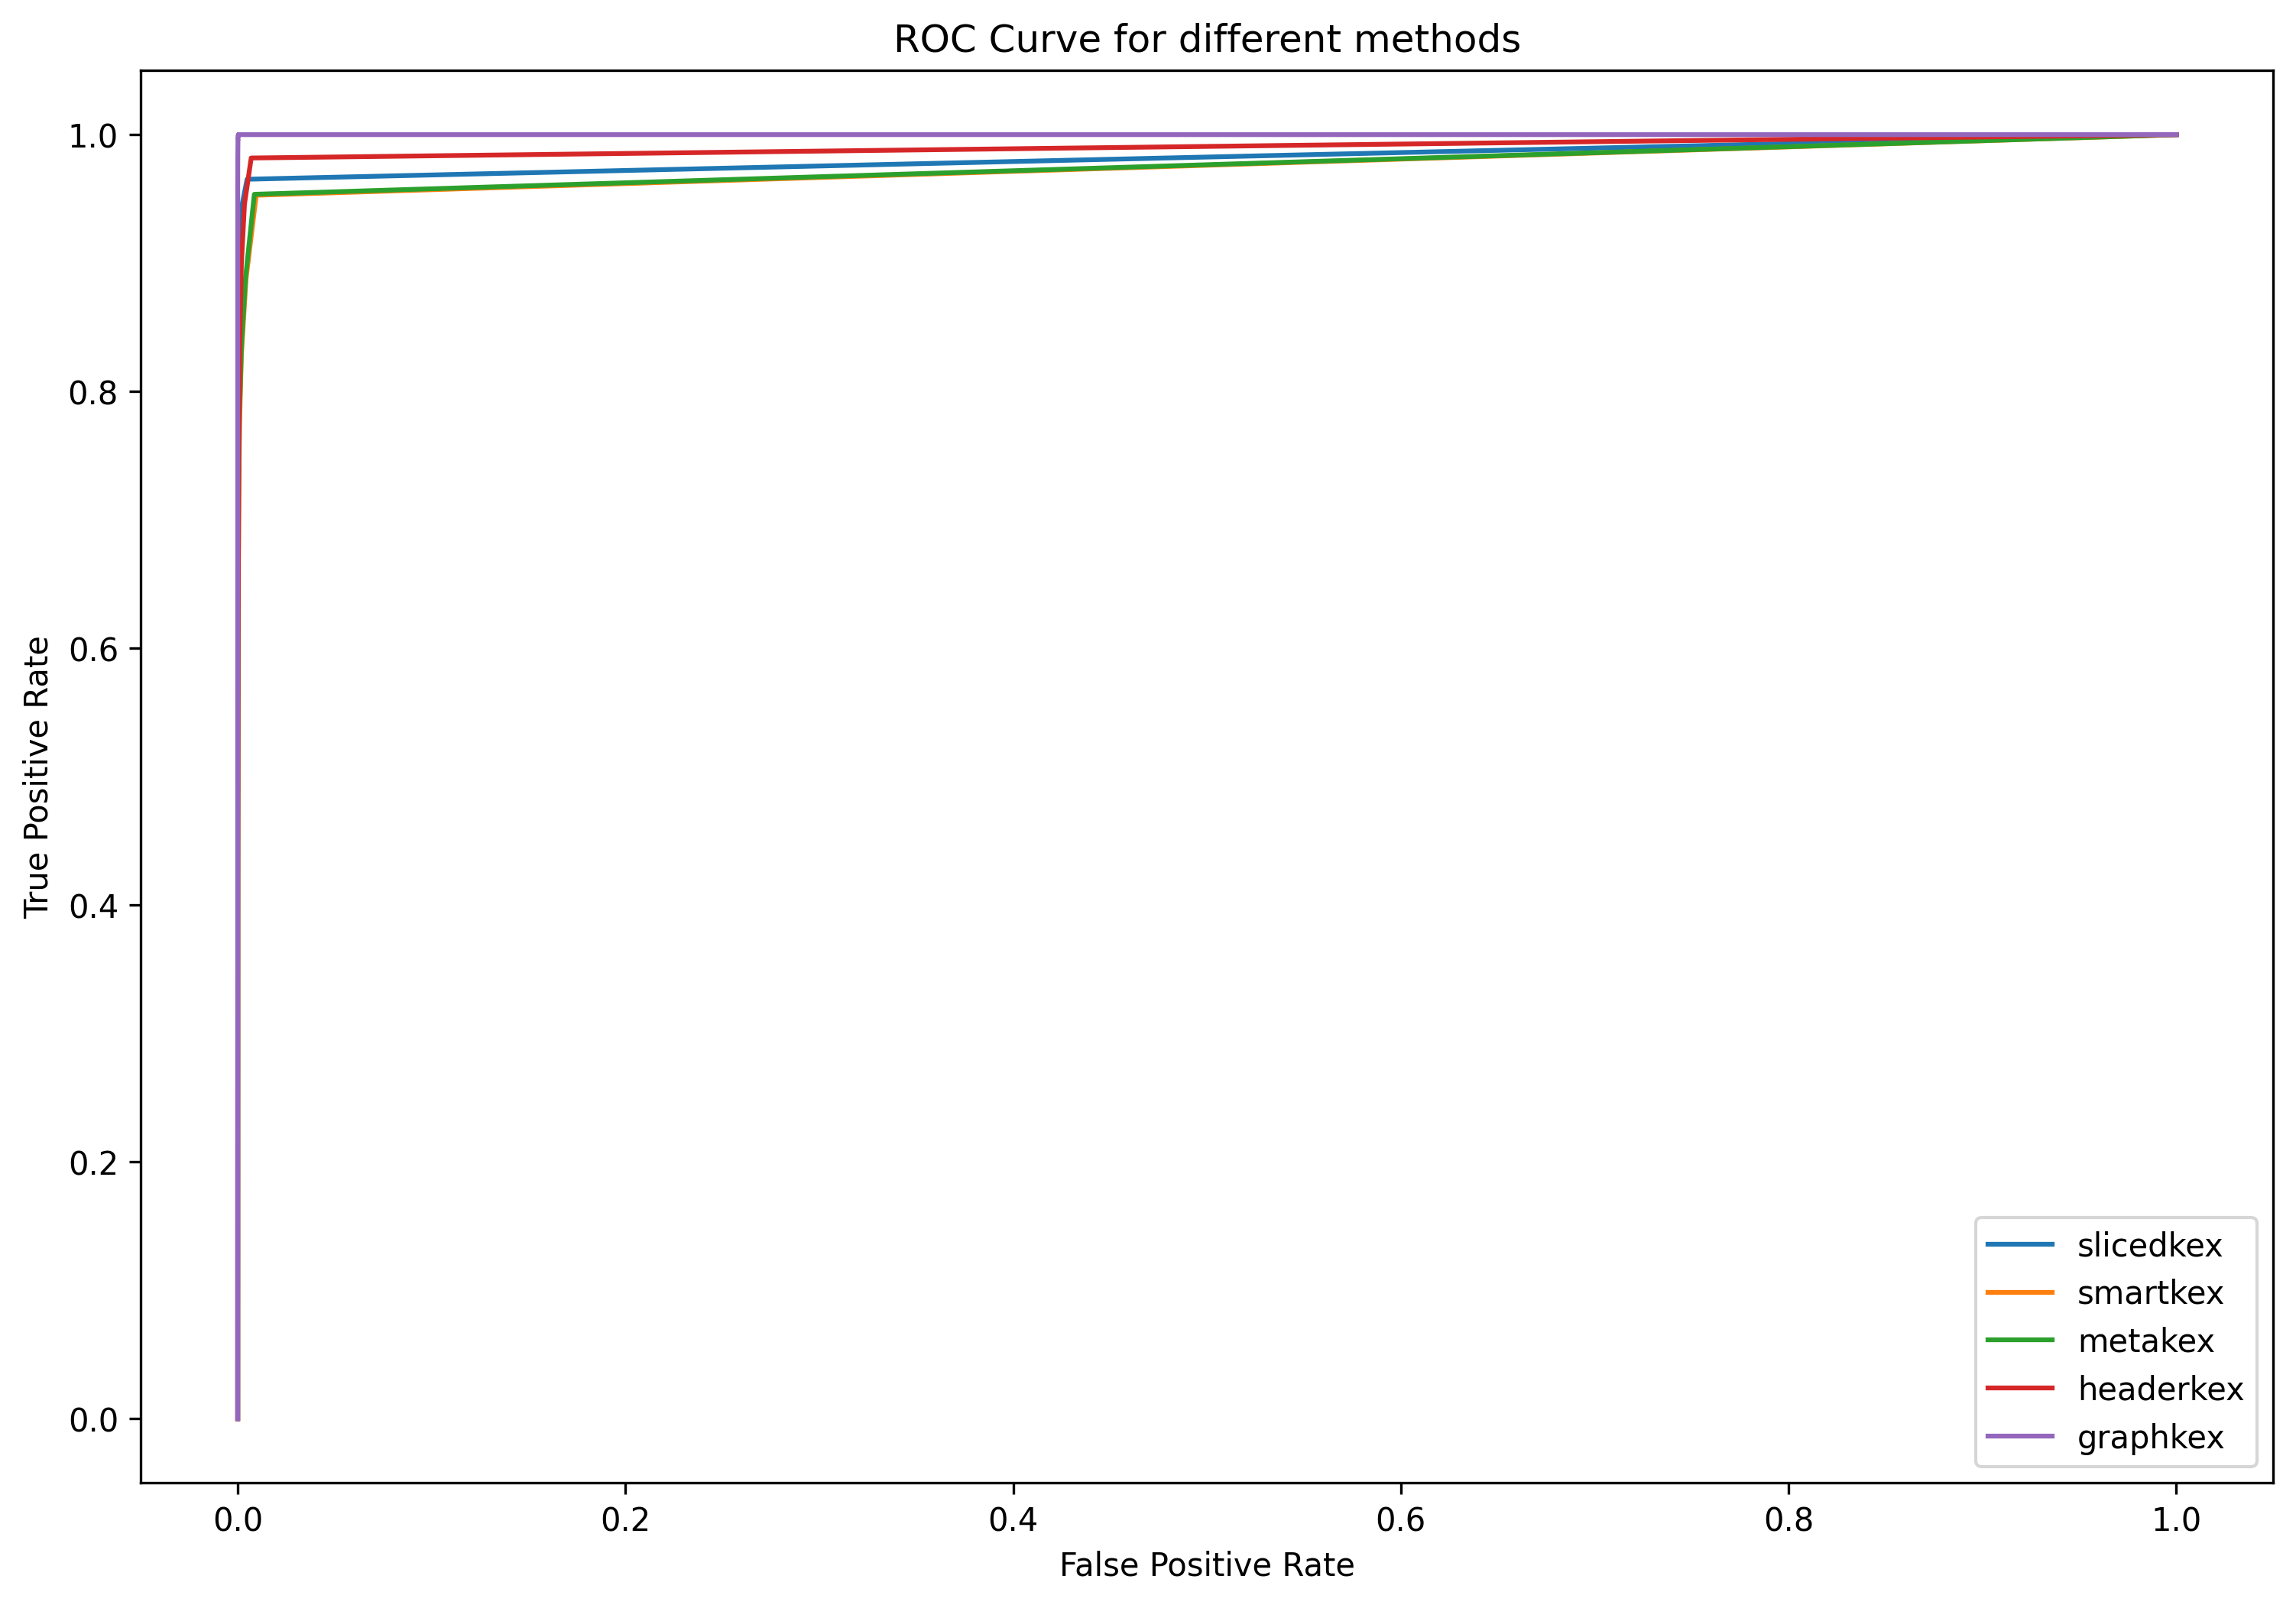

In [8]:
fig = plt.gcf()
for idx, algorithm in enumerate(algorithms):
    fpr = fpr_dict.get(algorithm)
    tpr = tpr_dict.get(algorithm)
    plt.plot(fpr, tpr, label=algorithm)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for different methods')
plt.legend()
fig.set_size_inches(12, 8)
fig.set_dpi(300)
plt.show()

In [9]:
precision_dict = dict()
recall_dict = dict()
thresholds_dict = dict()
auc_dict = dict()

for idx in range(len(algorithms)):
    algorithm = algorithms[idx]
    testing_labels = test_labels_dict[algorithm]
    probabilities = proba_dict[algorithm]
    recall, precision, thresholds = precision_recall_curve(testing_labels, probabilities)
    recall_dict[algorithm] = recall
    precision_dict[algorithm] = precision
    thresholds_dict[algorithm] = thresholds

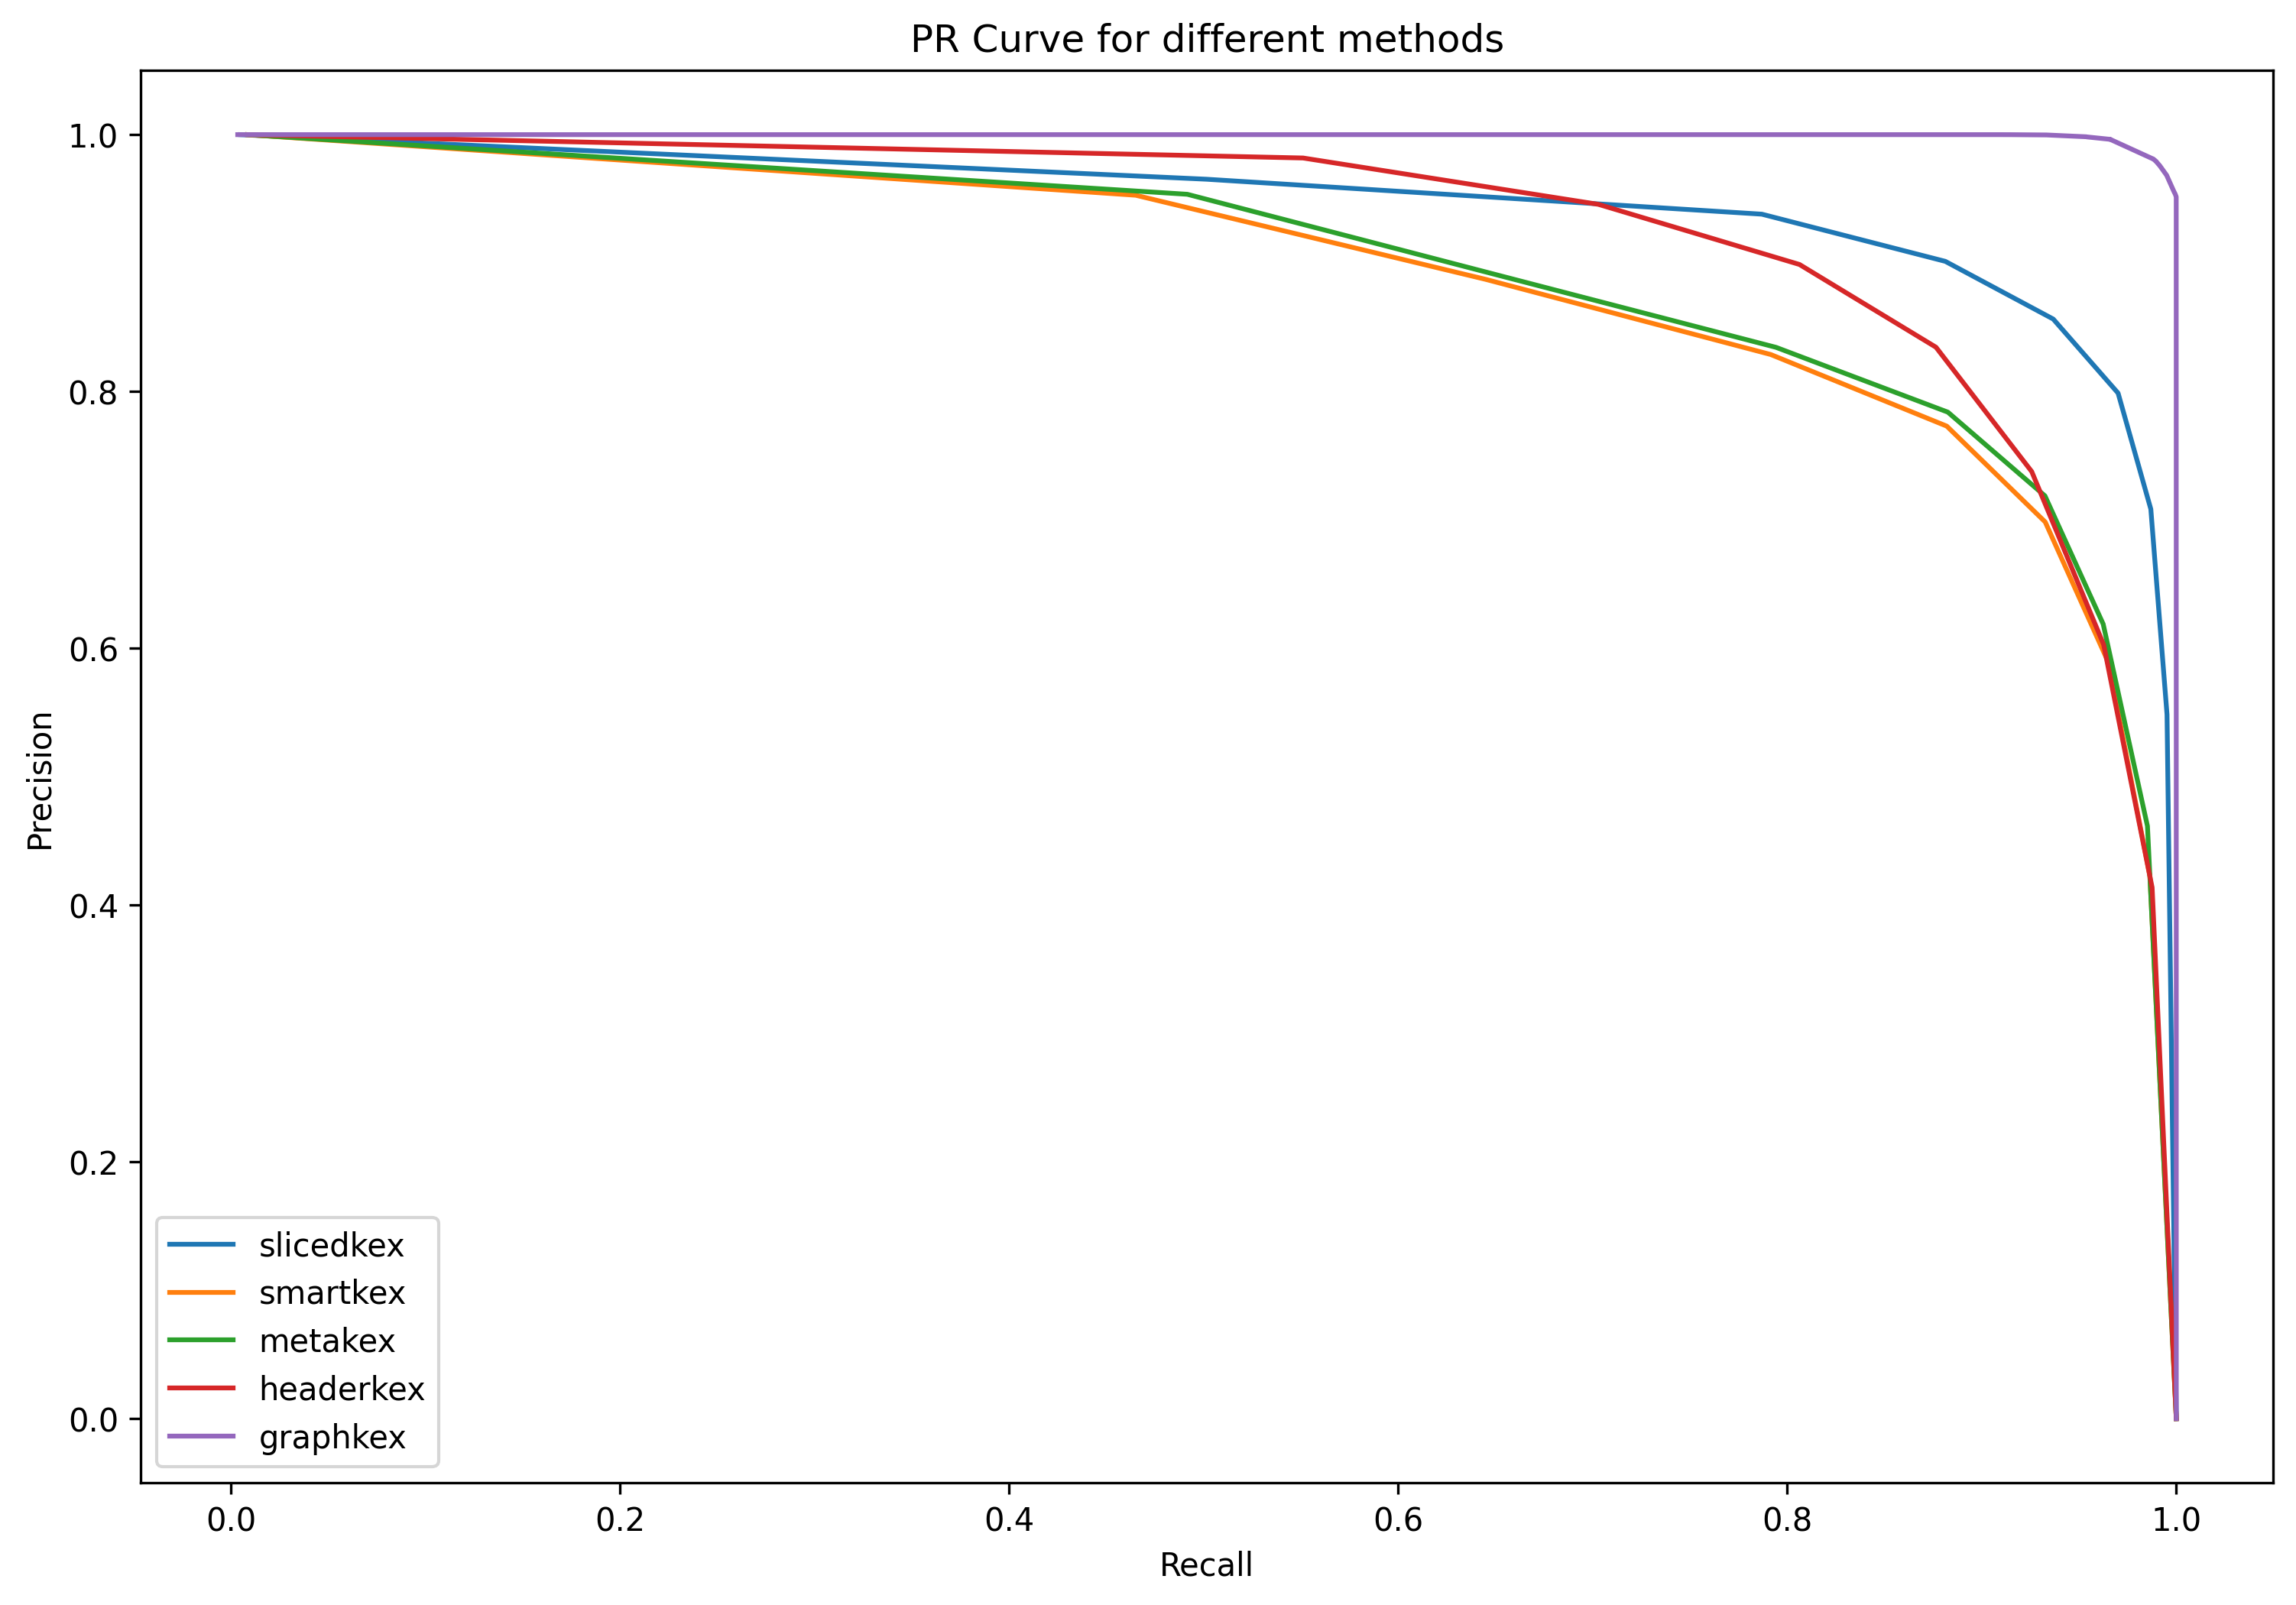

In [10]:
fig = plt.gcf()
for idx, algorithm in enumerate(algorithms):
    recall = recall_dict.get(algorithm)
    precision = precision_dict.get(algorithm)
    plt.plot(recall, precision, label=algorithm)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve for different methods')
plt.legend()
fig.set_size_inches(12, 8)
fig.set_dpi(300)
plt.show()

In [11]:
# Print metrics
for idx in range(len(algorithms)):
    dataset, labels = generate_dataset(heap_paths=test_heap_paths, json_paths=test_json_paths, obj_class=classes[idx], 
                                                   train_subset=train_subset, block_size=block_size, feature_vector_size=feature_vector_sizes[idx])
    predicted = clf_dict[algorithms[idx]].predict(dataset)
    accuracy = accuracy_score(y_true=labels, y_pred=predicted)
    precision = precision_score(y_true=labels, y_pred=predicted)
    recall = recall_score(y_true=labels, y_pred=predicted)
    f1 = f1_score(y_true=labels, y_pred=predicted)
    cm = confusion_matrix(y_true=labels, y_pred=predicted)
    print('--------------------------------------------------------------------')
    print(f'Metrics for {classes[idx]}')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-Score: {f1}')
    print(cm)
    print('--------------------------------------------------------------------')

Data Files: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15332/15332 [01:28<00:00, 172.50it/s]


Total files found: 15332
--------------------------------------------------------------------
Metrics for <class 'classes.slicedkex.SlicedKex'>
Accuracy: 0.9989865227586732
Precision: 0.9367441214956976
Recall: 0.8563673602552019
F1-Score: 0.894754284632137
[[21817660     6381]
 [   15849    94495]]
--------------------------------------------------------------------


Data Files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15332/15332 [06:03<00:00, 42.15it/s]


Total files found: 15332
--------------------------------------------------------------------
Metrics for <class 'classes.smartkex.SmartKex'>
Accuracy: 0.9971524539560718
Precision: 0.8820264923912016
Recall: 0.7729773864886933
F1-Score: 0.8239092869845994
[[9712392    8737]
 [  19185   65322]]
--------------------------------------------------------------------


Data Files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15332/15332 [05:43<00:00, 44.63it/s]


Total files found: 15332
--------------------------------------------------------------------
Metrics for <class 'classes.metakex.MetaKex'>
Accuracy: 0.9972386288864894
Precision: 0.8825810061820507
Recall: 0.7838758919379459
F1-Score: 0.830305271272162
[[9712316    8813]
 [  18264   66243]]
--------------------------------------------------------------------


Data Files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15332/15332 [05:25<00:00, 47.16it/s]


Total files found: 15332
--------------------------------------------------------------------
Metrics for <class 'classes.headerkex.HeaderKex'>
Accuracy: 0.9975596687456071
Precision: 0.8764853577288321
Recall: 0.8344279172139586
F1-Score: 0.8549397122921453
[[9711192    9937]
 [  13992   70515]]
--------------------------------------------------------------------


Data Files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15332/15332 [14:09<00:00, 18.05it/s]


Total files found: 12523
--------------------------------------------------------------------
Metrics for <class 'classes.graphkex.GraphKex'>
Accuracy: 0.9998899760855907
Precision: 0.9881554042187836
Recall: 0.9810531210043009
F1-Score: 0.9845914548194236
[[14353734      607]
 [     978    50640]]
--------------------------------------------------------------------
